# process spectra for AuxTel with new spectractor (March 2022) for particular config H, for Hologram

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : May 20th 2022

- version v3 : Work with exposure butlen gen3


- Config H:

       
       After pull request from Jeremy on git-branch issue-auxteltarget
       
       pour faire simple, je propose une pull request d'une branche qui contient mes réglages vers ta branche issue-auxteltarget :

       https://github.com/LSSTDESC/Spectractor/pull/95
       

This notebook is to help for finding the position of order 0

CCIN2P3:

- works with kernels **anaconda3_auxtel** (with libradtran) and **anaconda3_auxtel_v2** (no libradtran)
- works with kernel **python 3** locally 




- Creation May 25th 2022

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
print(sys.path)

['/Users/sylvie/MacOSX/GitHub/LSST/AuxTelComm/notebookccdm_gen3/runspectractor_standalone/2022_03', '/Users/sylvie/anaconda3/lib/python39.zip', '/Users/sylvie/anaconda3/lib/python3.9', '/Users/sylvie/anaconda3/lib/python3.9/lib-dynload', '', '/Users/sylvie/anaconda3/lib/python3.9/site-packages', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/aeosa', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/iminuit-2.11.2-py3.9-macosx-10.9-x86_64.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/schwimmbad-0.3.2-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/emcee-3.1.1-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/astroquery-0.4.6-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/docopt-0.6.2-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/pytz-2022.1-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/urllib3-1.26.

In [3]:
all_paths_to_remove = ['/opt/conda/lib/python3.8/site-packages','/pbs/home/d/dagoret/.local/lib/python3.8/site-packages']

for path_to_remove in all_paths_to_remove:
    if path_to_remove in sys.path:
        print(f"remove {path_to_remove} from sys.path")
        sys.path.remove(path_to_remove)

In [4]:
sys.path

['/Users/sylvie/MacOSX/GitHub/LSST/AuxTelComm/notebookccdm_gen3/runspectractor_standalone/2022_03',
 '/Users/sylvie/anaconda3/lib/python39.zip',
 '/Users/sylvie/anaconda3/lib/python3.9',
 '/Users/sylvie/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/iminuit-2.11.2-py3.9-macosx-10.9-x86_64.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/schwimmbad-0.3.2-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/emcee-3.1.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/astroquery-0.4.6-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/docopt-0.6.2-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/pytz-2022.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib import  transforms
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [6]:
sys.path

['/Users/sylvie/MacOSX/GitHub/LSST/AuxTelComm/notebookccdm_gen3/runspectractor_standalone/2022_03',
 '/Users/sylvie/anaconda3/lib/python39.zip',
 '/Users/sylvie/anaconda3/lib/python3.9',
 '/Users/sylvie/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/iminuit-2.11.2-py3.9-macosx-10.9-x86_64.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/schwimmbad-0.3.2-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/emcee-3.1.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/astroquery-0.4.6-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/docopt-0.6.2-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/pytz-2022.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages

In [7]:
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/Users/sylvie/anaconda3/bin/python
3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]


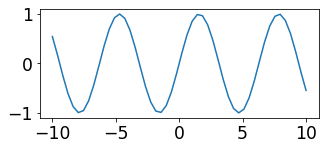

In [8]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               


In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.11.2'

In [11]:
from astropy.io import fits
from astropy.coordinates import Angle
from astropy import units as u
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

In [12]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("mu. Col")
print(result_table)
result_table = Simbad.query_object("HD111980")
print(result_table)
result_table = Simbad.query_object("eta1 dor")
print(result_table)

 MAIN_ID        RA           DEC      RA_PREC DEC_PREC COO_ERR_MAJA COO_ERR_MINA COO_ERR_ANGLE COO_QUAL COO_WAVELENGTH     COO_BIBCODE     SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"                         mas          mas           deg                                                                  
--------- ------------- ------------- ------- -------- ------------ ------------ ------------- -------- -------------- ------------------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162      14       14        0.066        0.080            90        A              O 2020yCat.1350....0G                1
 MAIN_ID        RA           DEC      RA_PREC DEC_PREC COO_ERR_MAJA COO_ERR_MINA COO_ERR_ANGLE COO_QUAL COO_WAVELENGTH     COO_BIBCODE     SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"                         mas          mas           deg                                                                  
--------- ------------- ------------- ------- -------- ---------

In [13]:
result_table = Simbad.query_object("ETA01 DOR")

In [14]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
* eta01 Dor,06 06 09.3817,-66 02 22.635,14,14,0.052,0.049,90,A,O,2020yCat.1350....0G,1


In [15]:
result_table["RA"]

06 06 09.3817


In [16]:
ra = Angle('06 06 09.3817 hours').deg 
ra

91.53909041666665

In [17]:
dec=Angle('-66 02 22.635 degrees').deg 
dec

-66.03962083333333

In [18]:
from scipy.stats import kurtosis,skew
from scipy.stats import kurtosistest,skewtest,normaltest

In [19]:
from distutils.dir_util import copy_tree
import shutil

# Configuration

In [20]:
version="v5.0"  # version of flipping
# create output directories if not exist and clean existing files
FLAG_MANAGE_OUTPUT_SPECTRACTOR=True
# allow to run reconstruction with Spectractor
FLAG_GO_FOR_RECONSTRUCTION_WTH_SPECTRACTOR=True

FLAG_REMOVE_WCS = False
FLAG_RUNWITHEXCEPTIONS = False

In [99]:
# Choose the config filename
list_of_spectractorconfigfiles= ["auxtel_configA.ini","auxtel_configB.ini","auxtel_configC.ini","auxtel_configD.ini","auxtel_configE.ini","auxtel_configF.ini","auxtel_configG.ini","auxtel_configH.ini"]
config_idx = 7
configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
#configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]
configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]

In [100]:
configdir

'configH'

# Path

In [23]:
# path index for each month
DATE="20220316"
disperserfiltername = "empty~holo4_003"

In [24]:
# select if we run at CC or not (locally) 
# /sps/lsst/groups/auxtel/data/2022/holo/20220317
HOSTCC=False

In [25]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/"+disperserfiltername+"/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+disperserfiltername+"/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+disperserfiltername+"/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+disperserfiltername+"/"+configdir)
        path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+disperserfiltername)

else:
    path_auxtel="/Users/sylvie/DATA/AuxTelData2022"
    path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/"+disperserfiltername+"/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+disperserfiltername+"/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+disperserfiltername+"/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+disperserfiltername+"/"+configdir)
        path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+disperserfiltername)


In [97]:
configdir

'auxtel'

In [26]:
path_images

'/Users/sylvie/DATA/AuxTelData2022/data/2022/empty~holo4_003/20220316'

In [27]:
path_topoutput_spectractor

'/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel'

In [28]:
path_output_spectractor

'/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316'

# Utility Functions

In [29]:
def is_nan(x):
    return (x != x)

# Logbook for input file selection

- the logbook contains all input image path and possibily the order 0 position

In [30]:
filename_logbook='logbooks/auxtelholologbook_'+DATE+'_' + version+'.csv'

In [31]:
df=pd.read_csv(filename_logbook,index_col=0)

In [32]:
pd.set_option('display.max_rows', None)

In [33]:
# show the list of input files from the logbook to select the file index in the logbook
df

,index,date,path,file,num,object,filter,disperser,airmass,exposure,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,2022-03-17T01:59:37.776,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600330_postisrccd.fits,330,ETA DOR,empty_1,holo4_003,1.385409,20.0,...,10.6,44.0,7.2,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,2022-03-17T02:00:10.693,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600331_postisrccd.fits,331,ETA DOR,empty_1,holo4_003,1.386483,20.0,...,10.6,44.0,7.4,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2022-03-17T02:03:04.275,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600337_postisrccd.fits,337,ETA DOR,empty_1,holo4_003,1.392269,20.0,...,10.6,43.0,7.4,NaN,NaN,NaN,NaN,,NaN,NaN
3,3,2022-03-17T02:03:37.365,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600338_postisrccd.fits,338,ETA DOR,empty_1,holo4_003,1.393378,20.0,...,10.6,43.0,7.4,NaN,NaN,NaN,NaN,,NaN,NaN
4,4,2022-03-17T02:06:31.026,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600344_postisrccd.fits,344,ETA DOR,empty_1,holo4_003,1.399309,20.0,...,10.5,43.0,8.2,NaN,NaN,NaN,NaN,,NaN,NaN
5,5,2022-03-17T02:07:03.927,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600345_postisrccd.fits,345,ETA DOR,empty_1,holo4_003,1.400449,20.0,...,10.5,43.0,7.6,NaN,NaN,NaN,NaN,,NaN,NaN
6,6,2022-03-17T02:11:00.681,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600351_postisrccd.fits,351,HD111980,empty_1,holo4_003,1.647734,20.0,...,10.5,43.0,13.1,300.0,1700.0,NaN,NaN,,1.0,1.0
7,7,2022-03-17T02:11:33.581,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600352_postisrccd.fits,352,HD111980,empty_1,holo4_003,1.643280,20.0,...,10.5,43.0,13.1,NaN,NaN,NaN,NaN,,NaN,NaN
8,8,2022-03-17T02:14:30.261,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600358_postisrccd.fits,358,HD111980,empty_1,holo4_003,1.619945,20.0,...,10.5,43.0,12.1,NaN,NaN,NaN,NaN,,NaN,NaN
9,9,2022-03-17T02:15:03.181,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600359_postisrccd.fits,359,HD111980,empty_1,holo4_003,1.615702,20.0,...,10.5,44.0,6.9,NaN,NaN,NaN,NaN,,NaN,NaN


# Selection of input file
- the input file is selected from the logbook list above

In [34]:
idx=1

In [35]:
print(df.iloc[idx]['file'])

exposure_2022031600331_postisrccd.fits


In [36]:
print(df.iloc[idx])

index                                                        1
date                                   2022-03-17T02:00:10.693
path           /sps/lsst/groups/auxtel/data/2022/holo/20220316
file                    exposure_2022031600331_postisrccd.fits
num                                                        331
object                                                 ETA DOR
filter                                                 empty_1
disperser                                            holo4_003
airmass                                               1.386483
exposure                                                  20.0
focus                                                 0.041059
seeing                                                0.921627
pressure                                                743.55
temperature                                               10.6
humidity                                                  44.0
windspd                                                

In [37]:
myhome=os.getenv("HOME")

In [38]:
dir_images=path_images

In [39]:
dir_images

'/Users/sylvie/DATA/AuxTelData2022/data/2022/empty~holo4_003/20220316'

In [40]:
filename_image=df['file'][idx]
filename_image

'exposure_2022031600331_postisrccd.fits'

In [41]:
target = df['object'][idx]
target

'ETA DOR'

## If order 0 position exists in logbook it is selected, otherwise put it by hand

In [42]:
if 'Obj-posXpix' in df.columns:
    x0=df['Obj-posXpix'][idx]
else:
    x0=300
    
if 'Obj-posYpix' in df.columns:    
    y0=df['Obj-posYpix'][idx]
else:
    y0=1700

In [43]:
FLAG_ORDER0_LOCATION=False

In [44]:
if not is_nan(x0)and not is_nan(y0):
    FLAG_ORDER0_LOCATION=True
    print("Order 0 location from logbook : ({},{})".format(x0,y0))
else:
    print("NO Order 0 location from logbook ! ")      

NO Order 0 location from logbook ! 


## Spectractor Configuration 

- Usually the Spectractor configuration file is put in local dir **./config**


Ma suggestion, pour l'étude du centre optique via les scans des hologrammes, est de **mettre SPECTRACTOR_COMPUTE_ROTATION_ANGLE sur False** . 

Comme les angles ne sont pas très grands, si les marges du rectangle sont assez larges, réglables avec : 

    [background subtraction parameters] 
    # half transverse width of the signal rectangular window in pixels 
    PIXWIDTH_SIGNAL = 40 

alors le spectrogramme devrait tenir dans une boite rectangulaire même sans rotation de l'image. **L'important est de garder SPECTRACTOR_DECONVOLUTION_FFM à True car c'est lui qui te donnera l'angle de l'axe de dispersion ajusté sur les données, dont la valeur sera dans le mot clé ROTANGLE du header de sortie**. 


In [45]:
rootfilename = filename_image.split(".")[0]
rootfilename_split =  rootfilename.split("_") 
filenumberdir = rootfilename_split[1] 

In [46]:
path_output_spectractor

'/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316'

In [47]:
configdir

'auxtel'

In [48]:

# Fullfilename
filename=os.path.join(dir_images,filename_image)


# subdirectory
#subdir=filename_image.split(".")[0]
subdir=filenumberdir

# final output directory (where results will be copied to be backed up at the end)
finalpath_output_spectractor=os.path.join(path_output_spectractor,subdir)


# local directories to put spectra and plots
if configdir =="":
    output_directory="./outputs_process_holo"
    output_figures="figures_process_holo"
else:
    output_directory = "./outputs_process_holo_" + configdir
    output_figures   = "./figures_process_holo_" + configdir
    
if not os.path.isdir(output_directory):
    os.mkdir(output_directory)
if not os.path.isdir(output_figures):
    os.mkdir(output_figures)
    

# Final output directory


guess = [300,1700]
disperser_label = "holo4_003"

# configuration

# special for scan in XY
if configdir=="":
    config="./config/auxtel_scanXY.ini"
else:
    config=configfilename
    
target=df.iloc[idx]["object"]

In [96]:
finalpath_output_spectractor

'/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331'

In [49]:
output_directory

'./outputs_process_holo_auxtel'

In [50]:
output_figures

'./figures_process_holo_auxtel'

In [51]:
if not os.path.isdir(output_directory):
    os.mkdir(output_directory)
if not os.path.isdir(output_figures):
    os.mkdir(output_figures)

In [52]:
print("config filename",config)

config filename ./config/auxtel_configH.ini


In [53]:
finalpath_output_spectractor

'/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331'

### manage output dir

In [54]:
def cleandir(path):
    if os.path.isdir(path):
        files=os.listdir(path)
        if len(files) > 0:
            for f in files:
                if os.path.isdir(os.path.join(path,f)):
                    if f==".ipynb_checkpoints":
                        shutil.rmtree(os.path.join(path,f))
                    else:
                        print(" Cannot remove this directory {}".format(os.path.join(path,f)))
                else:
                    os.remove(os.path.join(path,f))

In [55]:
path_toptopoutput_spectractor

'/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003'

In [56]:
# this flag must be set if one want to clean results from previous runs
if FLAG_MANAGE_OUTPUT_SPECTRACTOR:
    
    # manage global output directory of spectractor
    # Basically it has the name of the input file image
    
    if not os.path.isdir(path_toptopoutput_spectractor):
        os.mkdir(path_toptopoutput_spectractor) 
        
    if configdir !="":
    # top directory    
        if not os.path.isdir(path_topoutput_spectractor):
            os.mkdir(path_topoutput_spectractor)   
            
            
        if not os.path.isdir(path_output_spectractor):
            os.mkdir(path_output_spectractor)

    
    if not os.path.isdir(output_directory):
        os.mkdir(output_directory)
    else:
        cleandir(output_directory)
 
    # manage subdirs spectrum/ and plots/
    if not os.path.isdir(output_figures):
        os.mkdir(output_figures)
    else:
        cleandir(output_figures)
    
    if not os.path.isdir(finalpath_output_spectractor):
        os.mkdir(finalpath_output_spectractor)
        os.mkdir(os.path.join(finalpath_output_spectractor,"basespec"))
        os.mkdir(os.path.join(finalpath_output_spectractor,"plots"))
    else:
        #cleandir(finalpath_output_spectractor)
        cleandir(os.path.join(finalpath_output_spectractor,"basespec"))
        cleandir(os.path.join(finalpath_output_spectractor,"plots"))

# Configuration of the Spectractor running mode

In [57]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [58]:
target

'ETA DOR'

## Load the image in the new image file with Spectractor

In [59]:
#image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)
image=Image(file_name=filename, disperser_label=disperser_label, config=config)

No rebinning: parameters.REBIN is forced to 1.
target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      RA_PREC DEC_PREC COO_ERR_MAJA COO_ERR_MINA COO_ERR_ANGLE COO_QUAL ... PLX_QUAL     PLX_BIBCODE        PMRA     PMDEC   PM_ERR_MAJA PM_ERR_MINA PM_ERR_ANGLE  Z_VALUE  SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"                         mas          mas           deg               ...                               mas / yr  mas / yr   mas / yr    mas / yr      deg                                
----------- ------------- ------------- ------- -------- ------------ ------------ ------------- -------- ... -------- ------------------- --------- --------- ----------- ----------- ------------ --------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635      14       14        0.052        0.049            90        A ...        A 2020yCat.1350....0G    13.575    28.139       0.066       0.061           90 0.0000590              

In [60]:
image.data.shape

(4072, 4000)

## Show relevant parameters

In [61]:
print(parameters)

<module 'spectractor.parameters' from '/Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg/spectractor/parameters.py'>


In [62]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH=output_figures

In [63]:
image.filter_label

''

In [64]:
image.header["FILTER"]

'empty_1'

In [65]:
image.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'LSST DM Header Service'                                              
TIMESYS = 'TAI     '                                                            
DATE    = '2022-03-17T01:59:56.544'                                             
DATE-OBS= '2022-03-17T01:59:56.544'                                             
DATE-BEG= '2022-03-17T02:00:10.693'                                             
DATE-END= '2022-03-17T02:00:30.923'                                             
MJD     =     59655.0832933353                                                  
MJD-OBS =     59655.0834570961                                                  
MJD-BEG =     59655.08345709

# Plot image and find the target position

- this image plotting is used to find the order 0 location to be set in logbook

- for the moment this is humanly done

## Load the new image file with Spectractor

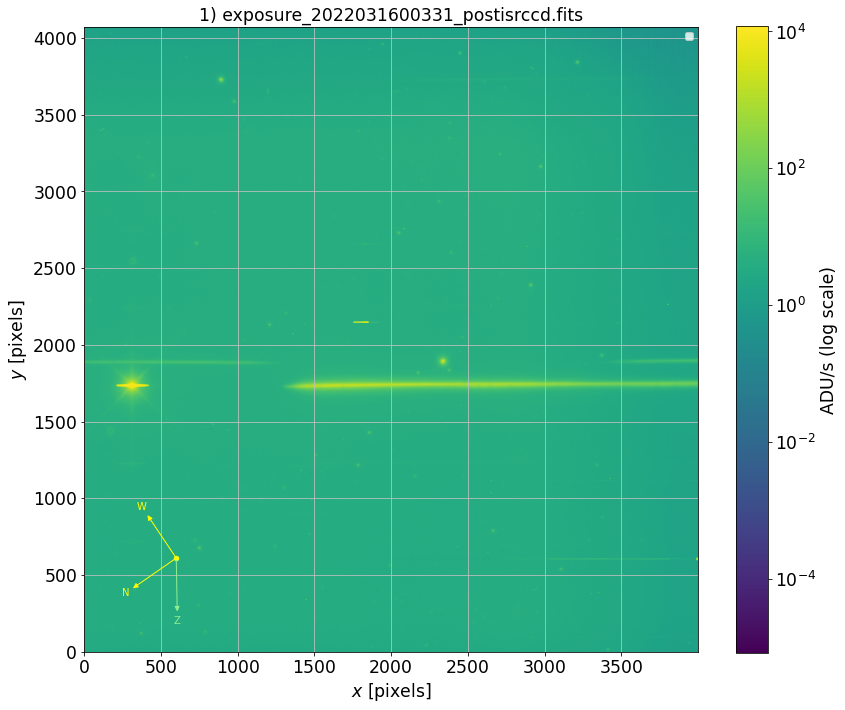

In [66]:
title="{}) {}".format(idx,filename_image)
image.plot_image(figsize=(12, 10),scale="log",title=title)

- note now the position are written in the make_logbook.ipynb notebook

## Set the 0th order location to be provided to Spectractor

In [67]:
filename_image

'exposure_2022031600331_postisrccd.fits'

In [68]:
# overwrite if localtion is taken from that in logbook
if FLAG_ORDER0_LOCATION : 
    print("Set Order 0 location from logbook : ({},{})".format(x0,y0))
    guess = [x0,y0]

## Let Spectractor find the location of the 0th order

2022-05-25 17:55:18  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                c0_1       
    ----------------- ------------------- -------------------
    6.798547405049312 0.05048619956994287 0.10936732041201457
2022-05-25 17:55:19  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 18 iterations because the relative change of cost is below ftol=1.25e-05.


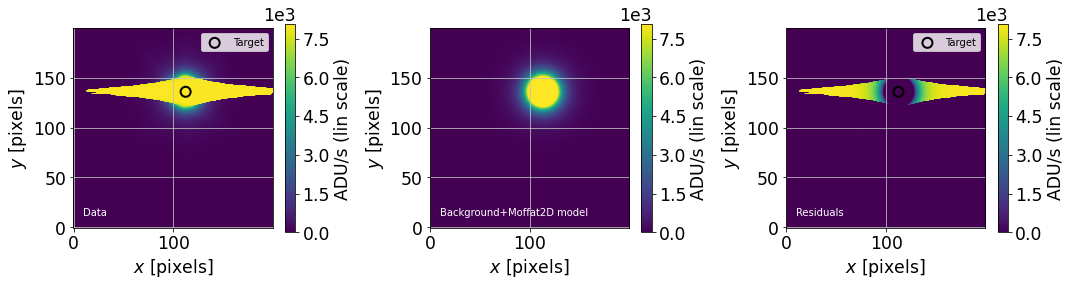

2022-05-25 17:55:20  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=5e-05.


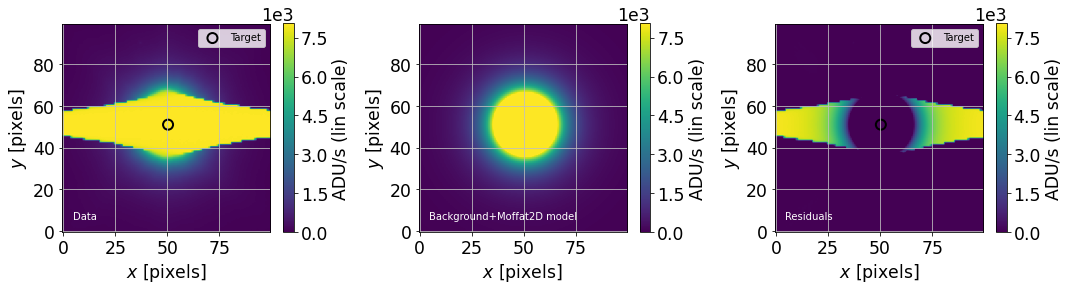

In [69]:

parameters.VERBOSE = True
parameters.DEBUG = True
#x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)
x1, y1 = find_target(image, guess,rotated=False)

In [70]:
print(x1,y1)

312.3612436451685 1735.98077912846


## Check the location of 0th order and Analysis of the quality of its focus

In [71]:
if x1>100:
    WID=100
else:
    WID=50
    

thumbnail=np.copy(image.data[int(y1)-WID:int(y1)+WID,int(x1)-WID:int(x1)+WID])
thumbnail_y=thumbnail.sum(axis=1)
thumbnail_x=thumbnail.sum(axis=0)
xx=np.linspace(int(x1)-WID,int(x1)+WID,len(thumbnail_x))
yy=np.linspace(int(y1)-WID,int(y1)+WID,len(thumbnail_y))
k0=kurtosis(thumbnail,axis=None,bias=True,fisher=True)
kx=kurtosis(thumbnail_x,bias=True,fisher=True)
ky=kurtosis(thumbnail_y,bias=True,fisher=True)
s0=skew(thumbnail,axis=None,bias=True)
sx=skew(thumbnail_x,bias=True)
sy=skew(thumbnail_y,bias=True)
        

In [72]:
shape_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}, Skx = {:3.3f}, Sky = {:3.3f} \n'.format(s0,sx,sy),
        r'kurtosis : K0  = {:3.3f}, Kx  = {:3.3f},  Ky = {:3.3f}'.format(k0,kx,ky)))

In [73]:
skew_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}'.format(s0),
        r'             : Skx = {:3.3f}'.format(sx),
        r'             : Sky = {:3.3f}'.format(sy)))

In [74]:
kurt_str='\n'.join((
        r'kurtosis : K0 = {:3.3f}'.format(k0),
        r'             : Kx = {:3.3f}'.format(kx),
        r'             : Ky = {:3.3f}'.format(ky)))

In [75]:
kurtosis_test_prob=kurtosistest(thumbnail,axis=None).pvalue
skew_test_prob=skewtest(thumbnail,axis=None).pvalue
normal_test_prob=normaltest(thumbnail,axis=None).pvalue

In [76]:
kurtosis_test_val=kurtosistest(thumbnail,axis=None).statistic
skew_test_val=skewtest(thumbnail,axis=None).statistic
normal_test_val=normaltest(thumbnail,axis=None).statistic

In [77]:
kurtosis_test_prob_x=kurtosistest(thumbnail_x).pvalue
skew_test_prob_x=skewtest(thumbnail_x).pvalue
normal_test_prob_x=normaltest(thumbnail_x).pvalue

In [78]:
kurtosis_test_prob_y=kurtosistest(thumbnail_y).pvalue
skew_test_prob_y=skewtest(thumbnail_y).pvalue
normal_test_prob_y=normaltest(thumbnail_y).pvalue

In [79]:
skew_str='\n'.join((
    r'skew     : Sk0 = {:3.3f}'.format(s0),
    r'             : Skx = {:3.3f}'.format(sx),
    r'             : Sky = {:3.3f}'.format(sy),
    r'             : p_test   = {:3.3e}'.format(skew_test_prob),
    r'             : p_test_x = {:3.3e}'.format(skew_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(skew_test_prob_y)))

In [80]:
kurt_str='\n'.join((
    r'kurtosis : K0 = {:3.3f}'.format(k0),
    r'             : Kx = {:3.3f}'.format(kx),
    r'             : Ky = {:3.3f}'.format(ky),
    r'             : p_test   = {:3.3e}'.format(kurtosis_test_prob),
    r'             : p_test_x = {:3.3e}'.format(kurtosis_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(kurtosis_test_prob_y)))

In [81]:
norm_str='\n'.join((
    r'normal  : p_test   = {:3.3e}'.format(normal_test_prob),
    r'             : p_test_x = {:3.3e}'.format(normal_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(normal_test_prob_y)))

In [82]:
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [83]:
#matplotlib.pyplot.hist(x, 
#                       bins=10, 
#                       range=None, 
#                       normed=False, 
#                       weights=None, 
#                       cumulative=False, 
#                       bottom=None, 
#                       histtype=u'bar', 
#                       align=u'mid', 
#                       orientation=u'vertical', 
#                       rwidth=None, 
#                       log=False, 
#                       color=None, 
#                       label=None, 
#                       stacked=False, 
#                       hold=None, 
#                       **kwargs)

Text(0.5, 0.98, '1) exposure_2022031600331_postisrccd.fits')

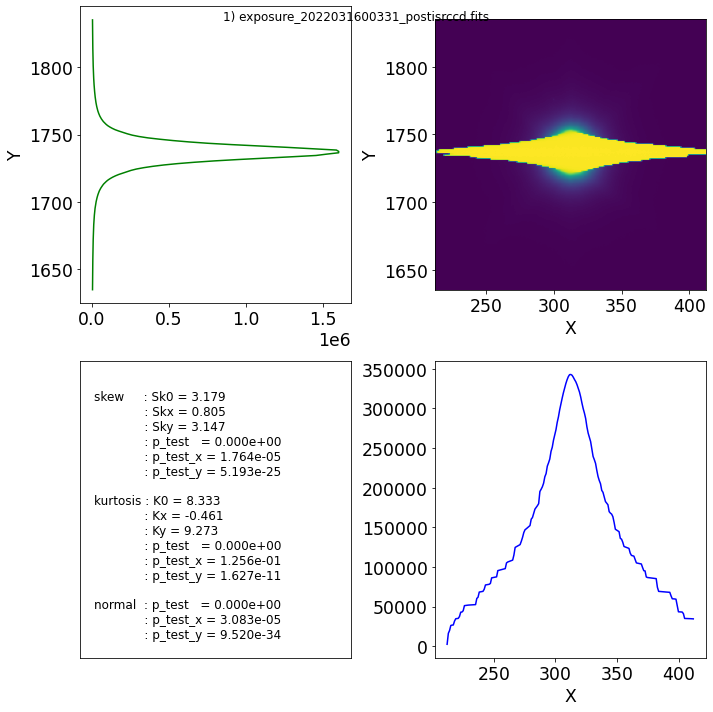

In [84]:
fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0.12, right=0.95, wspace=0.3,
                    bottom=0.15, top=0.9)

ax=fig.add_subplot(222)
ax.imshow(thumbnail,origin="lower",extent=(int(x1)-WID,int(x1)+WID,int(y1)-WID,int(y1)+WID))
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax=fig.add_subplot(221)
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(-90)
#ax.plot(yy,thumbnail_y,"g",rotation=u'vertical')
ax.plot(-yy,thumbnail_y,"g",transform= rot + base)
ax.set_ylabel("Y")

ax=fig.add_subplot(224)
ax.plot(xx,thumbnail_x,"b")
ax.set_xlabel("X")
plt.tight_layout()

ax=fig.add_subplot(223)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

ax.text(0.05, 0.9, skew_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.55, kurt_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.2, norm_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
plt.suptitle(title)

In [85]:
# Usually stop here if one just want to get the 0th order location
if not FLAG_GO_FOR_RECONSTRUCTION_WTH_SPECTRACTOR:
    assert False
else:
    assert True

# Go for spectrum reconstruction

In [86]:
#parameters.debug=True
#parameters.verbose=True
#parameters.display=True
#parameters.LIVE_FIT=False

In [87]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [88]:
filename

'/Users/sylvie/DATA/AuxTelData2022/data/2022/empty~holo4_003/20220316/exposure_2022031600331_postisrccd.fits'

In [89]:
output_directory

'./outputs_process_holo_auxtel'

2022-05-25 17:55:22  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2022-05-25 17:55:22  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/sylvie/DATA/AuxTelData2022/data/2022/empty~holo4_003/20220316/exposure_2022031600331_postisrccd.fits...
2022-05-25 17:55:22  Image      load_AUXTEL_image    INFO   
	Image loaded


No rebinning: parameters.REBIN is forced to 1.
Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: pipeline
x spectractor_fit_target_centroid: fit	=> parameters.SPECTRACTOR_FIT_TARGET_CENTROID: fit	 <class 'str'>
x spectractor_compute_rotation_angle: disperser	=> parameters.SPECTRACTOR_COMPUTE_ROTATION_ANGLE: disperser	 <class 'str'>
x spectractor_deconvolution_psf2d: False	=> parameters.SPECTRACTOR_DECONVOLUTION_PSF2D: False	 <class 'bool'>
x spectractor_deconvolution_ffm: True	=> parameters.SPECTRACTOR_DECONVOLUTION_FFM: True	 <class 'bool'>
x spectractor_deconvolution_sigma_clip: 100	=> parameters.SPECTRACTOR_DE

2022-05-25 17:55:22  Image      load_image           INFO   
	Loading disperser holo4_003...
2022-05-25 17:55:22  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg/spectractor/extractor/dispersers/holo4_003
2022-05-25 17:55:22  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 156.00 +/- 1.00 grooves/mm
	Average tilt of -0.3 degrees
2022-05-25 17:55:25  Star       load                 INFO   
	Simbad:
  MAIN_ID         RA           DEC      RA_PREC DEC_PREC COO_ERR_MAJA COO_ERR_MINA COO_ERR_ANGLE COO_QUAL ... PLX_QUAL_2    PLX_BIBCODE_2      PMRA_2   PMDEC_2  PM_ERR_MAJA_2 PM_ERR_MINA_2 PM_ERR_ANGLE_2 Z_VALUE_2 SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"                         mas          mas           deg               ...                                 mas / yr  mas / yr    mas / yr      mas / yr        deg                                 
-----------

target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      RA_PREC DEC_PREC COO_ERR_MAJA COO_ERR_MINA COO_ERR_ANGLE COO_QUAL ... PLX_QUAL_2    PLX_BIBCODE_2      PMRA_2   PMDEC_2  PM_ERR_MAJA_2 PM_ERR_MINA_2 PM_ERR_ANGLE_2 Z_VALUE_2 SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"                         mas          mas           deg               ...                                 mas / yr  mas / yr    mas / yr      mas / yr        deg                                 
----------- ------------- ------------- ------- -------- ------------ ------------ ------------- -------- ... ---------- ------------------- --------- --------- ------------- ------------- -------------- --------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635      14       14        0.052        0.049            90        A ...          A 2020yCat.1350....0G    13.575    28.139         0.066         0.061             90 0.0000590                1


2022-05-25 17:55:25  Star       load_spectra         INFO   
	Loading /Users/sylvie/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/eta1dor_stis_002.fits


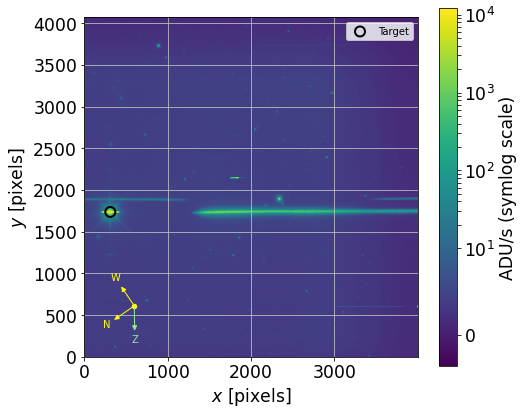

2022-05-25 17:55:29  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 312.36124365 1735.98077913]...
2022-05-25 17:55:29  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                 c1_0                  c0_1         
    ------------------ --------------------- ----------------------
    23.567952202594082 0.0022125041100363183 -0.0069311504754760965
2022-05-25 17:55:29  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 12 iterations because the relative change of cost is below ftol=1.25e-05.


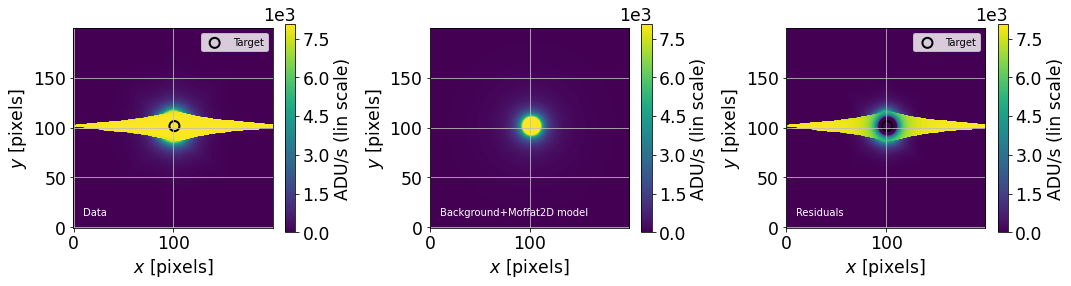

2022-05-25 17:55:30  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 1 iterations because the relative change of cost is below ftol=5e-05.


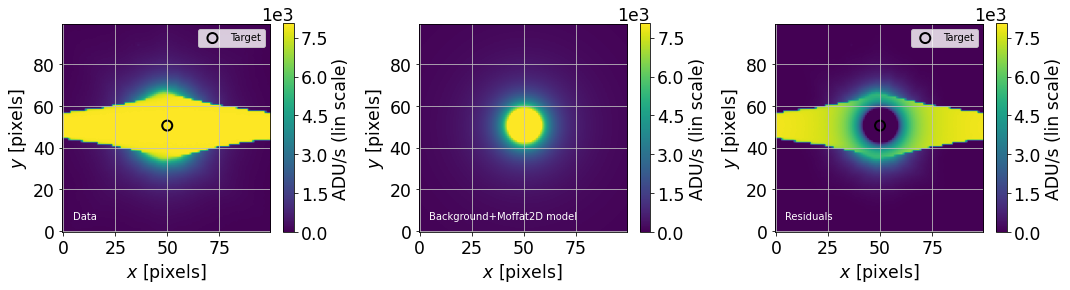

2022-05-25 17:55:31  Image      find_target          INFO   
	X,Y target position in pixels: 312.967,1736.533
2022-05-25 17:55:31  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.28 degree


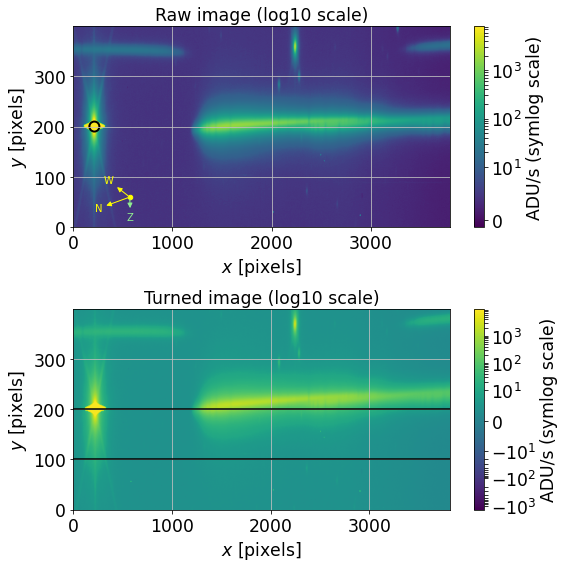

2022-05-25 17:55:41  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2022-05-25 17:55:41  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0              c0_1      
    ------------------ ------------------ ----------------
    1911.0813025934112 1.0417089417650283 2.15462842478811
2022-05-25 17:55:41  spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: x_c has a null Jacobian; parameter is fixed at its last known current value (52.98864538078087).
2022-05-25 17:55:41  spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: y_c has a null Jacobian; parameter is fixed at its last known current value (48.34501724931175).
2022-05-25 17:55:41  spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: gamma has a null Jacobian; parameter is fixed at its last known current value (10

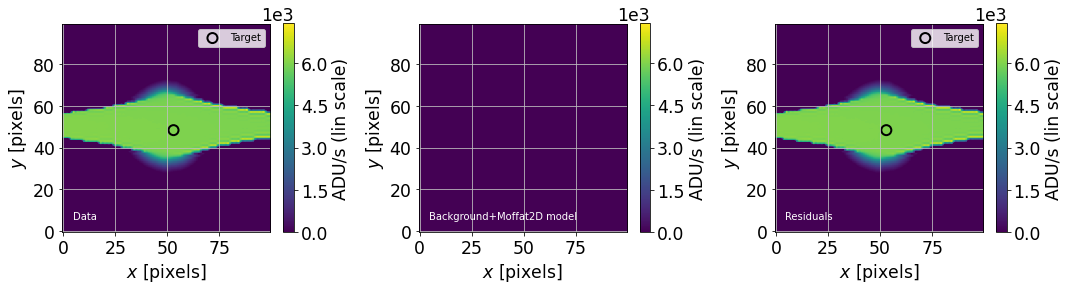

2022-05-25 17:55:42  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: amplitude has a null Jacobian; parameter is fixed at its last known current value (-1.1688098311424256e-08).
2022-05-25 17:55:42  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: x_c has a null Jacobian; parameter is fixed at its last known current value (23.18756726713828).
2022-05-25 17:55:42  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: y_c has a null Jacobian; parameter is fixed at its last known current value (27.450033701278343).
2022-05-25 17:55:42  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma has a null Jacobian; parameter is fixed at its last known current value (100.0).
2022-05-25 17:55:42  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha has a null Jacobian; parameter is fixed at its last known current value (15.587032611462089).
2022-05-25 17:55:42  spectractor.fit.fitter gradient_descent     WARNING 
	Gradient descent te

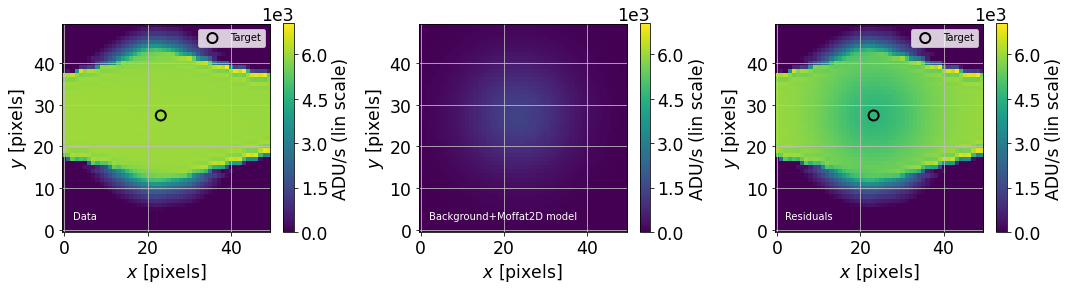

2022-05-25 17:55:42  Image      find_target          INFO   
	X,Y target position in pixels: 324.188,1737.450
2022-05-25 17:55:42  Spectrum   __init__             INFO   
	Spectrum info copied from image
2022-05-25 17:55:42  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*40 pixels and background from 140 to 180 pixels
2022-05-25 17:55:43  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop rotated image [1172:3476,1557:1917] (size (2304, 360))


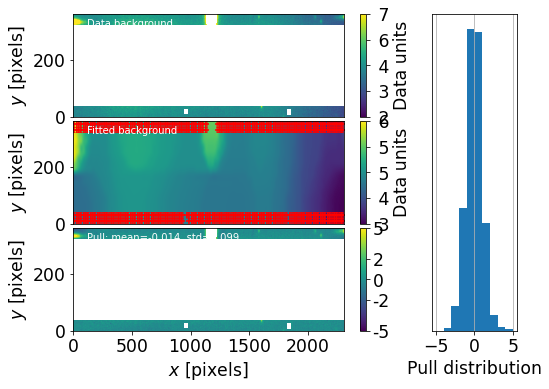

2022-05-25 17:55:45  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
/Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg/spectractor/extractor/psf.py:707: RuntimeWarning: invalid value encountered in true_divide
  out = evaluate_moffat1d_unnormalized(y, amplitude, y_c, gamma, alpha) / norm


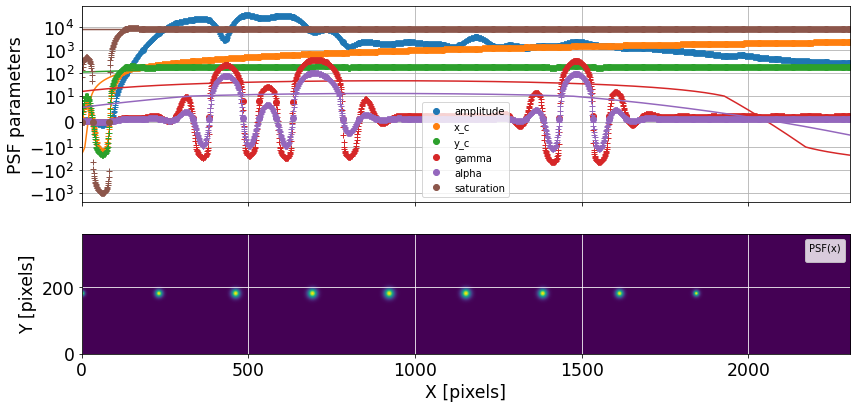

2022-05-25 17:55:50  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=2.7717e+08 initial chisq_red=1503.8
		 Line search: alpha_min=0.382 iter=3 funcalls=7
	Parameter shifts: [ 2.93086306  5.09206443  2.63782406 -0.04297772  8.55860693 40.33907878
 -1.74936967  0.24286458 12.028267  ]
	New parameters: [  0.72512245  -9.41128789 -26.57995915  45.58293305  63.23016056
 -12.65330059  11.4501071   17.13194738   2.67588587]
	Final cost=2.4589e+08 final chisq_red=1334.1 computed in 1.35s
2022-05-25 17:55:52  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=2.4589e+08 initial chisq_red=1334.1
		 Line search: alpha_min=1.62 iter=1 funcalls=5
	Parameter shifts: [10.2076251  17.86927773  9.76311671  2.51602412 13.79473954 58.84724306
 -5.91117331 -8.74600854  0.28541895]
	New parameters: [ 10.93274755   8.45798983 -16.81684244  48.09895717  77.0249001
  46.19394247   5.53893379   8.38593884   2.96130482]
	Final cost=1.2992e+08 final chi

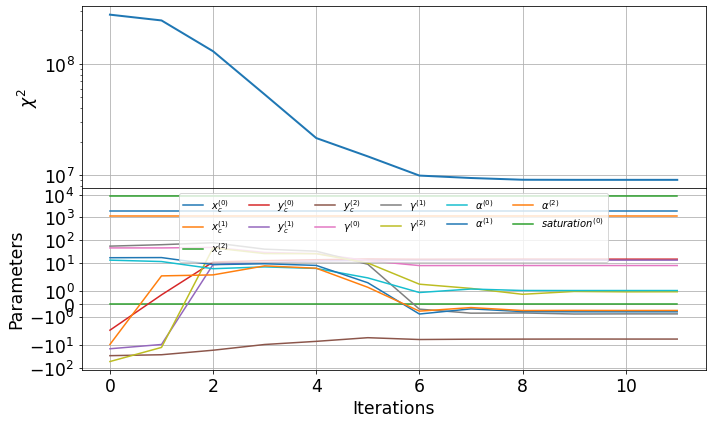

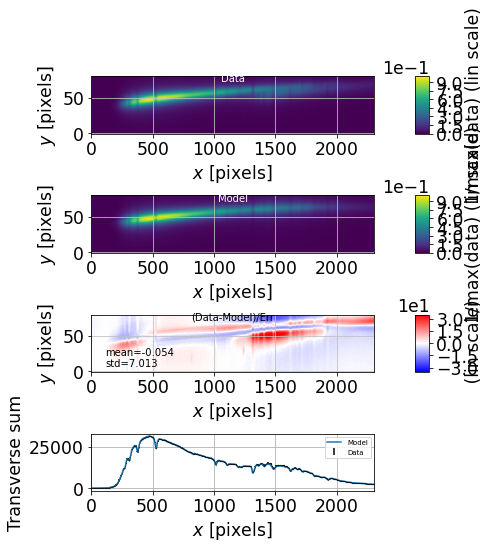

2022-05-25 17:56:04  ChromaticPSF1DFitWorkspace plot_correlation_matrix INFO   Save figure ./figures_process_holo_auxtel/parameters_correlation.pdf.


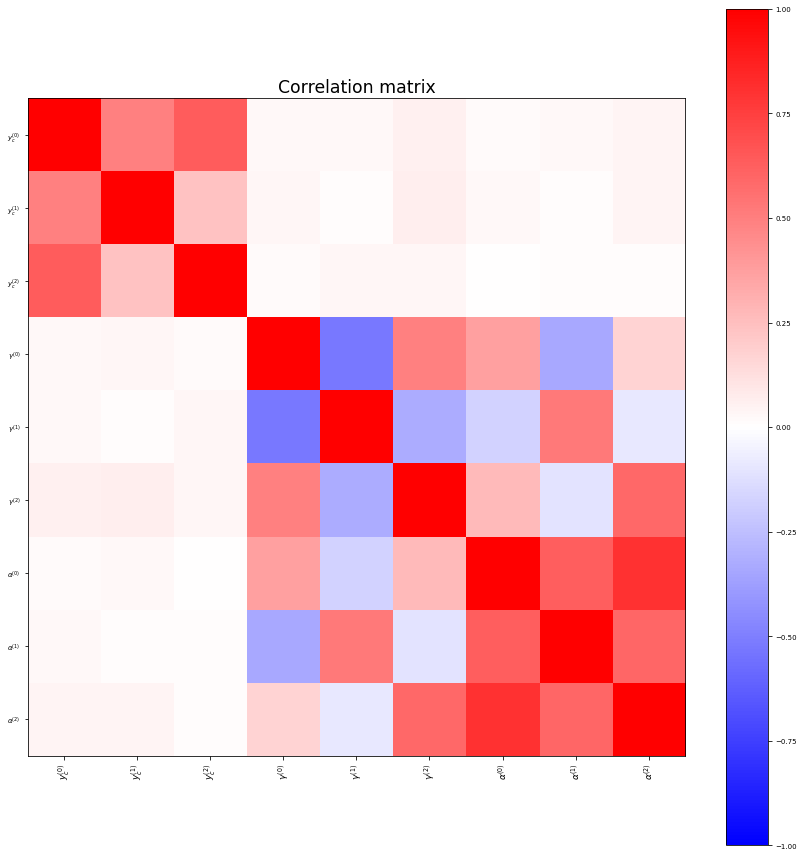

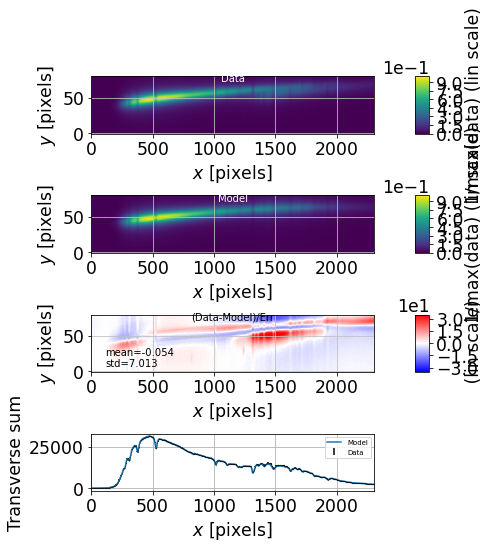

2022-05-25 17:56:09  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop raw image [1159:3463,1541:1913] (size (2304, 372))


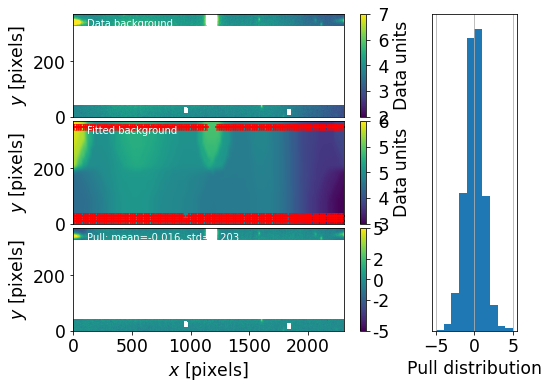

2022-05-25 17:56:11  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=4.367 ADU/s, RMS=0.638 ADU/s.
2022-05-25 17:56:12  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1159:3463,1541:1913] (size (2304, 372))
	New target position in spectrogram frame: [-846.0330667334925, 195.53338410970036]


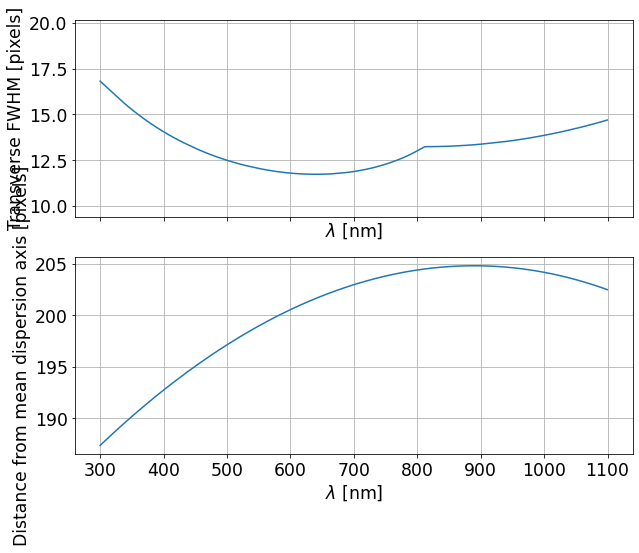

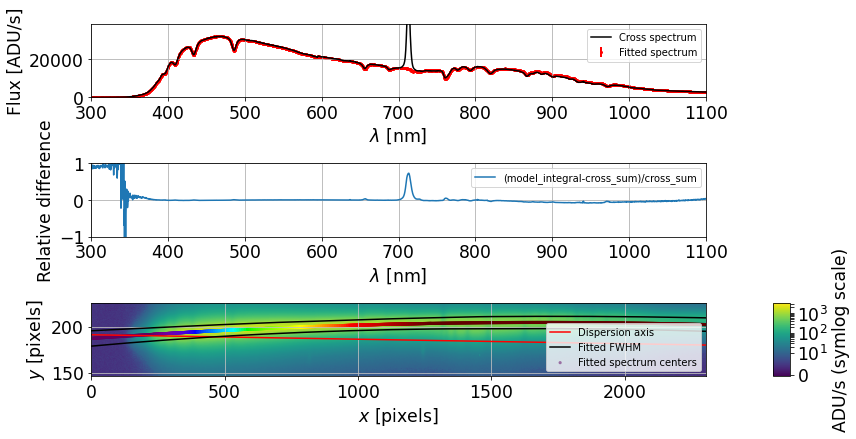

2022-05-25 17:56:13  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...


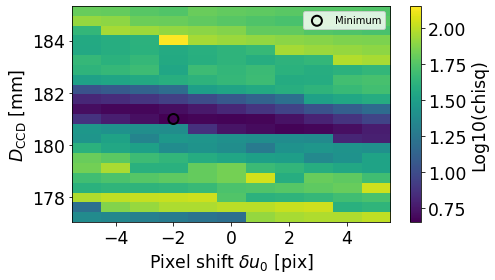

2022-05-25 17:56:35  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: -2.000pix
	D = 181.001 mm (default: DISTANCE2CCD = 181.00 +/- 0.75 mm, 0.0 sigma shift)
2022-05-25 17:56:39  FullForwardModelFitWorkspace __init__             INFO   
	Full forward model fitting with regularisation parameter r=1.
2022-05-25 17:59:09  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=5.0438e+08 initial chisq_red=3010.7
		 Line search: alpha_min=2.23 iter=0 funcalls=5
	Parameter shifts: [1.65644595e+01 5.62326475e-03]
	New parameters: [16.56445952 -0.27437674]
	Final cost=1.5198e+08 final chisq_red=907.21 computed in 124.46s
2022-05-25 18:01:24  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=1.5198e+08 initial chisq_red=907.21
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [-2.54002687  0.00521786]
	New parameters: [14.02443266 -0.26915887]
	Final cost=1.3129e+08 final chisq_red=783.71 computed in 135.06s
2022-05

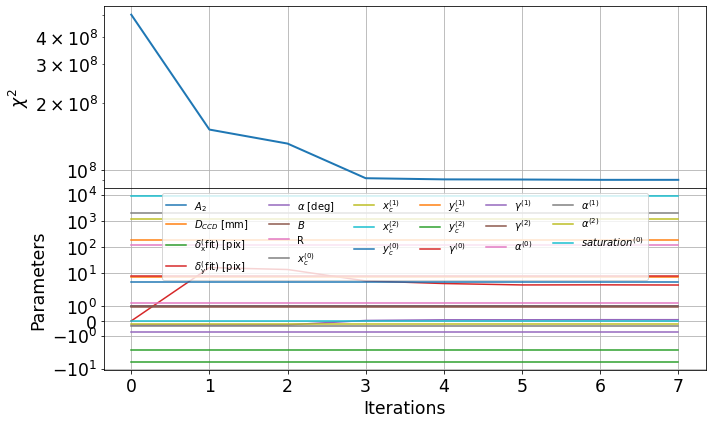

2022-05-25 18:14:22  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit.pdf.
2022-05-25 18:14:24  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit_2.pdf.


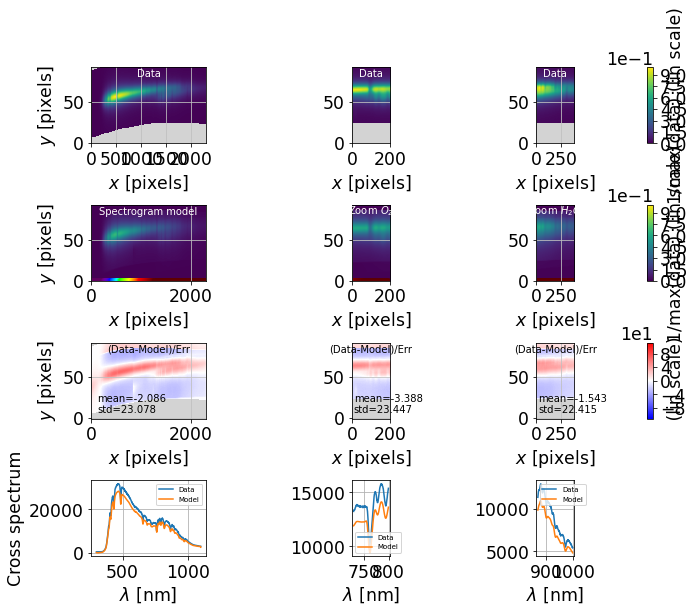

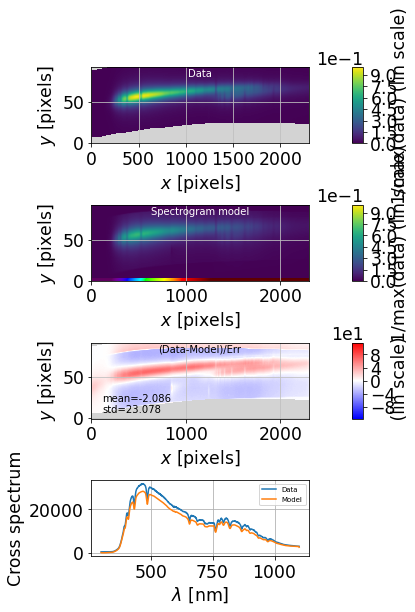

2022-05-25 18:14:26  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure ./figures_process_holo_auxtel/parameters_correlation.pdf.


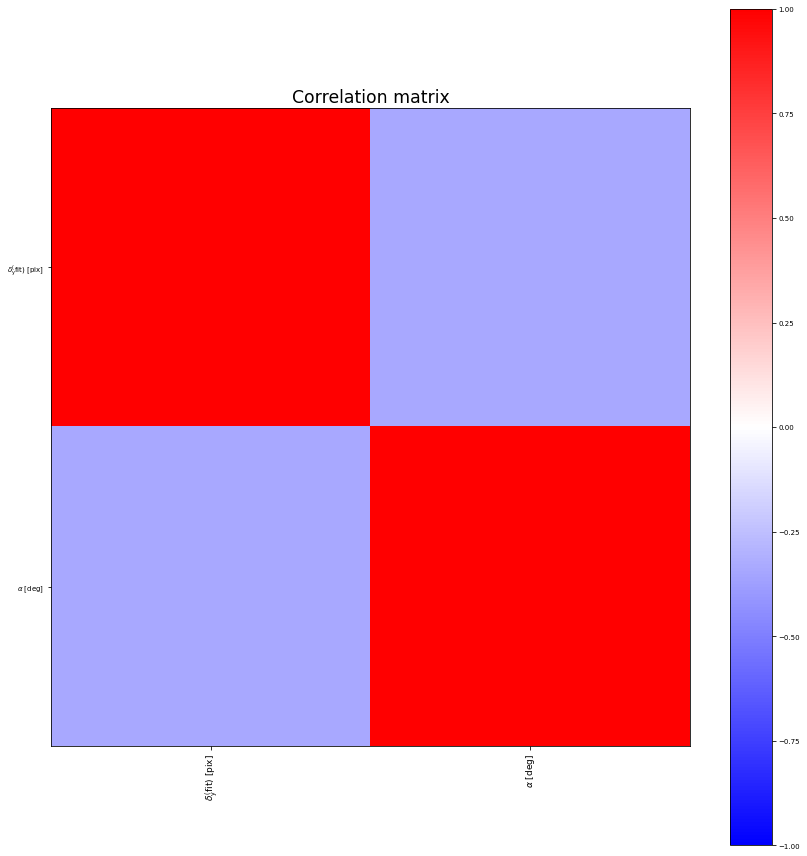

2022-05-25 18:14:54  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit.pdf.
2022-05-25 18:14:55  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit_2.pdf.


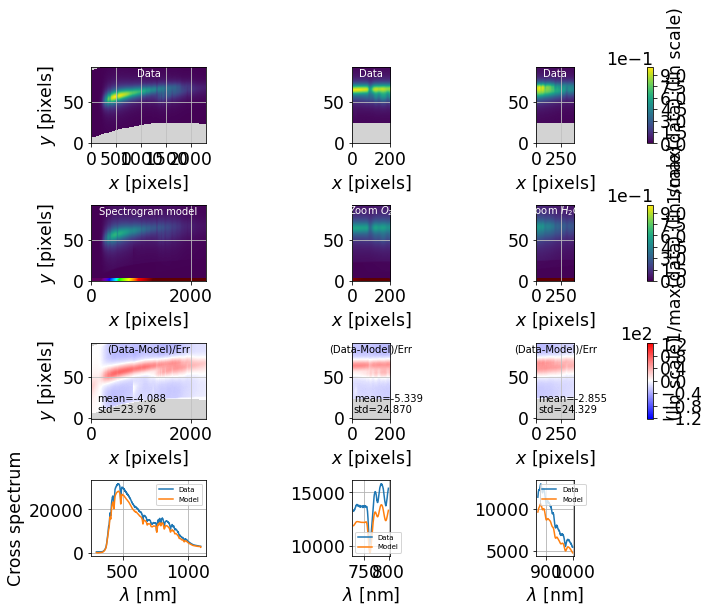

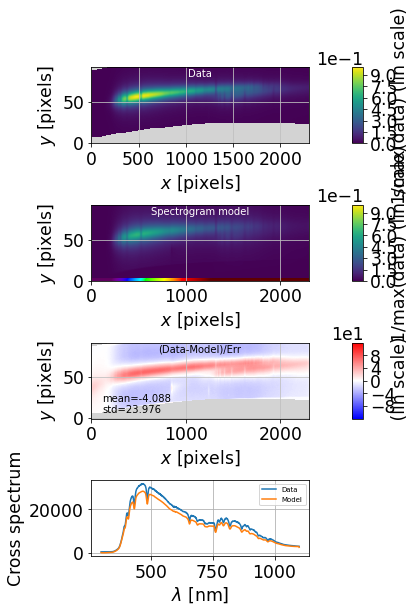

2022-05-25 18:14:57  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Start guess: [ 1.00000000e+00  1.81000987e+02 -1.99999610e+00  3.60101785e+00
  8.67660458e-02  1.00000000e+00  1.24293395e+02  1.99928856e+03
  1.15148625e+03  4.87246042e-13  4.80606866e+00  7.57837126e+00
 -5.42408034e+00  7.65388178e+00 -7.85034672e-01  9.70583045e-01
  1.23330043e+00 -3.31917725e-01 -1.90104465e-01  8.50017940e+03]
	with ['A2', 'D_CCD [mm]', 'shift_x [pix]', 'shift_y [pix]', 'angle [deg]', 'B', 'R', 'x_c_0', 'x_c_1', 'x_c_2', 'y_c_0', 'y_c_1', 'y_c_2', 'gamma_0', 'gamma_1', 'gamma_2', 'alpha_0', 'alpha_1', 'alpha_2', 'saturation_0']
2022-05-25 18:20:18  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=9.9073e+07 initial chisq_red=591.38
		 Line search: alpha_min=0.618 iter=3 funcalls=7
	Parameter shifts: [-2.05738177e-01  3.00152345e-03 -3.07557802e+00 -3.04457212e+00
 -5.68750235e-01  7.95923725e-02 -8.34764756e-02  8.15780602e-02]
	New parameters: [ 3

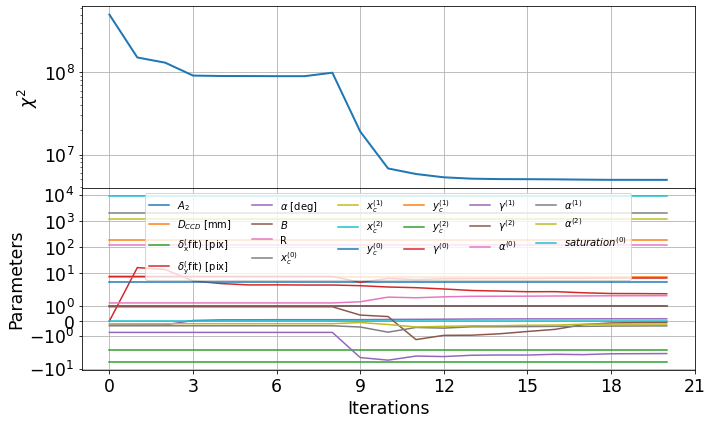

2022-05-25 19:06:30  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit.pdf.
2022-05-25 19:06:32  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit_2.pdf.


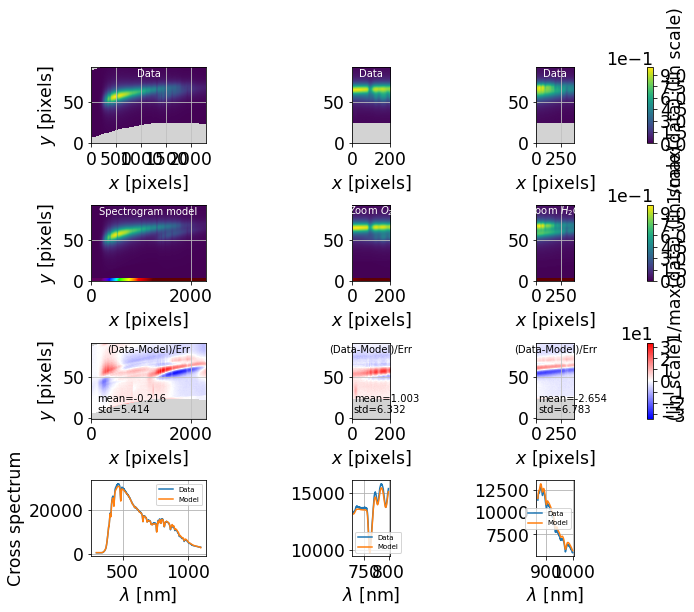

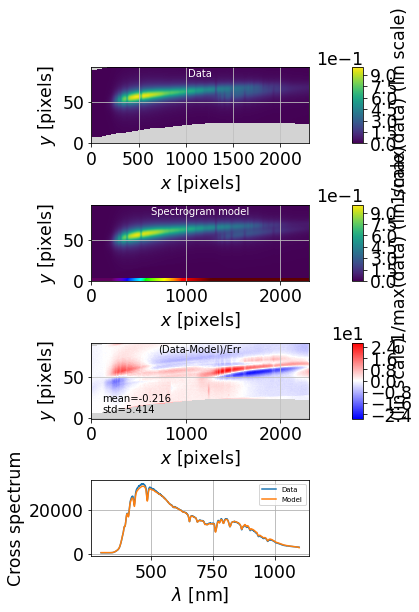

2022-05-25 19:06:34  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure ./figures_process_holo_auxtel/parameters_correlation.pdf.


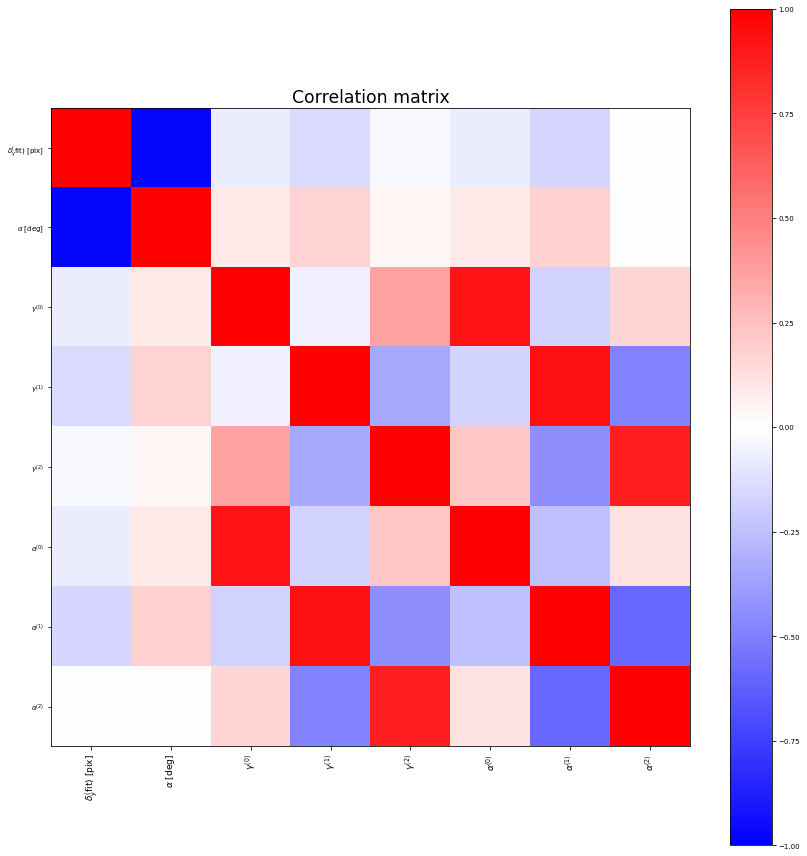

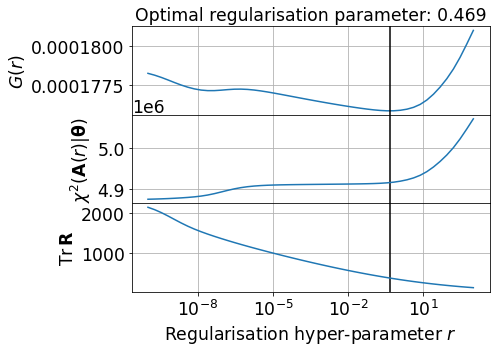

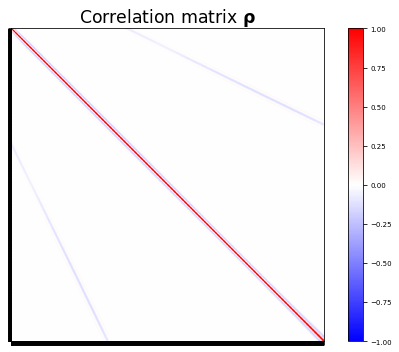

2022-05-25 19:09:02  RegFitWorkspace print_regularisation_summary INFO   
	Optimal regularisation parameter: 0.4691508418869575
	Tr(R) = 354.22136228591717
	N_params = 2304
	N_data = 167530 (without mask and outliers)
2022-05-25 19:12:14  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=4.7579e+06 initial chisq_red=28.464
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [ 0.05078645 -0.00182217 -0.04103322 -0.04250379  0.09072086 -0.0140116
 -0.01432848  0.01588451]
	New parameters: [ 1.91217553  0.14438811  6.61139043 -2.73996869 -0.01228299  1.71484969
 -0.35596622 -0.20177897]
	Final cost=4.7333e+06 final chisq_red=28.317 computed in 151.83s
2022-05-25 19:14:50  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=4.7333e+06 initial chisq_red=28.317
		 Line search: alpha_min=1.62 iter=1 funcalls=5
	Parameter shifts: [ 0.06144591 -0.0022944  -0.04424505 -0.10505512  0.00220499 -0.0064261
 -0.01659618  0.00648664]

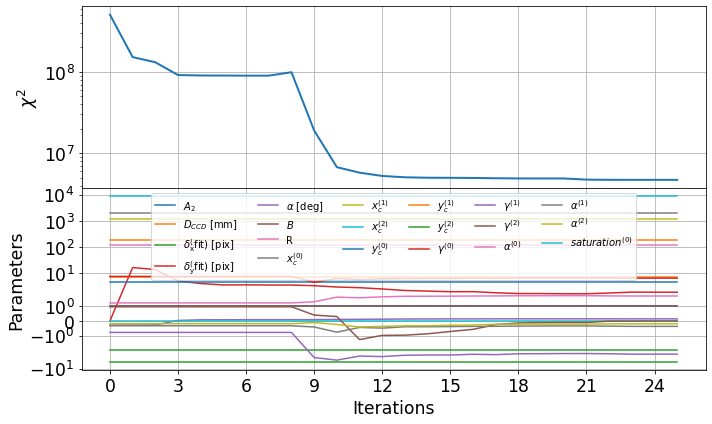

2022-05-25 19:20:14  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit.pdf.
2022-05-25 19:20:15  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit_2.pdf.


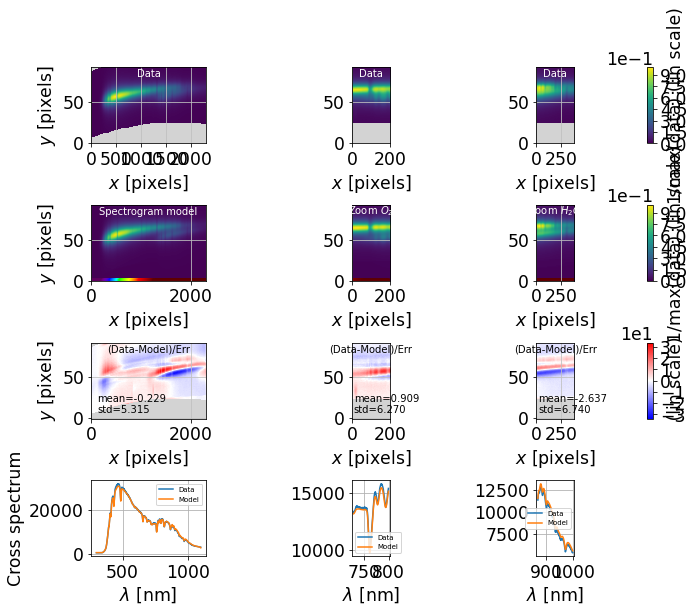

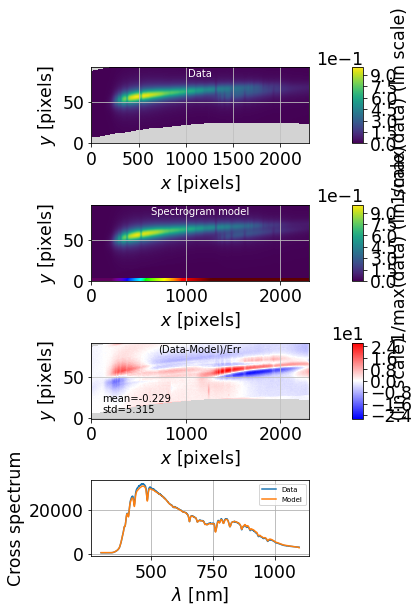

2022-05-25 19:20:17  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure ./figures_process_holo_auxtel/parameters_correlation.pdf.


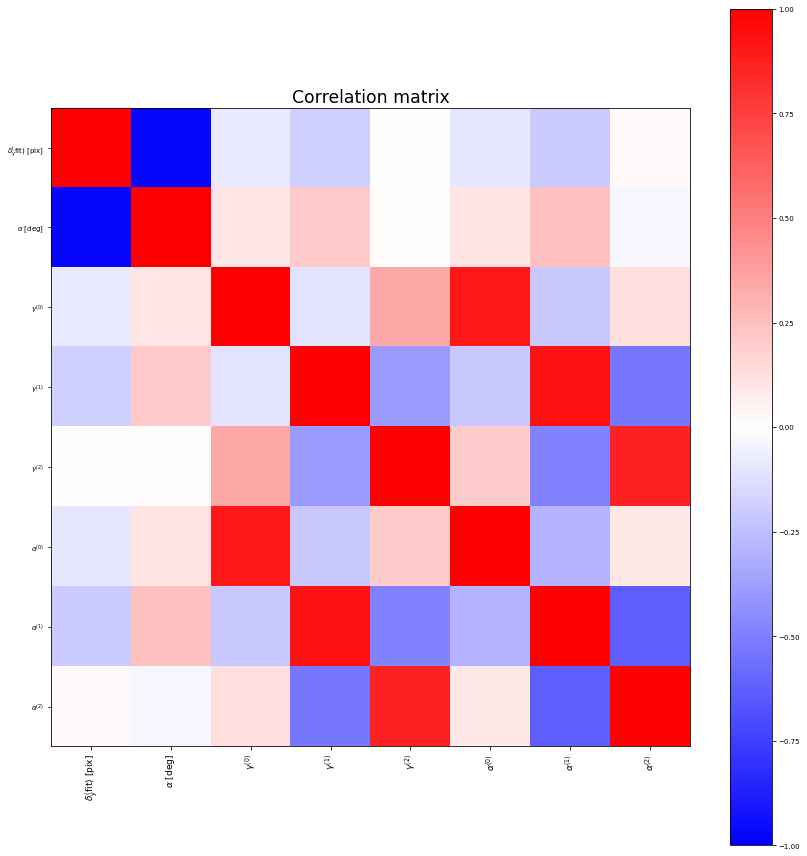

2022-05-25 19:20:17  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-05-25 19:20:17  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Newton: total computation time: 3920.736110687256s
2022-05-25 19:20:18  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit.pdf.
2022-05-25 19:20:20  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit_2.pdf.


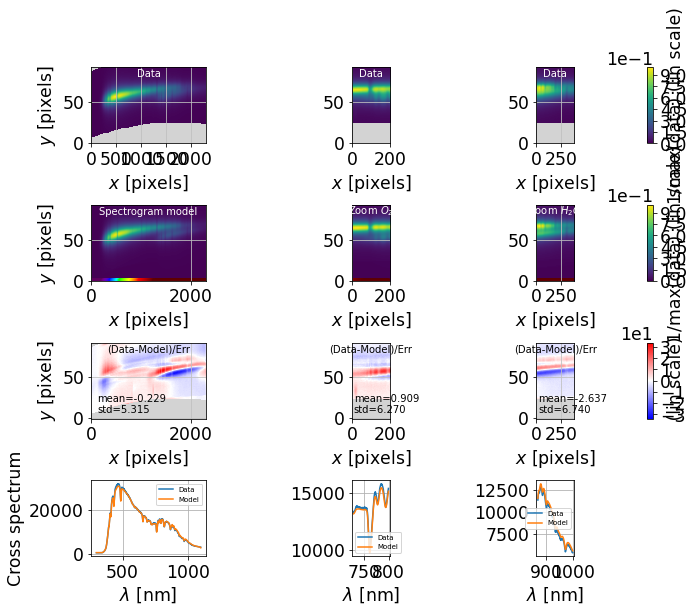

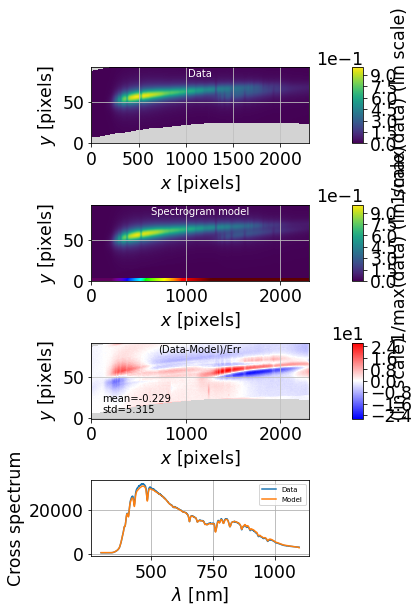

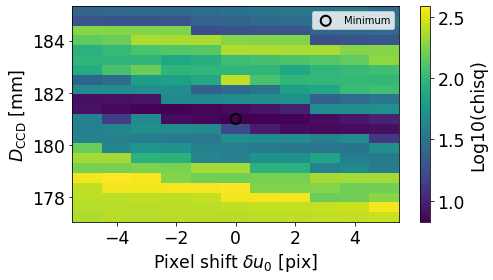

2022-05-25 19:20:44  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: 0.001pix
	D = 181.010 mm (default: DISTANCE2CCD = 181.00 +/- 0.75 mm, 0.0 sigma shift)
2022-05-25 19:23:38  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=4.9307e+06 initial chisq_red=29.498
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [ 0.05343892 -0.00077647 -0.00061111 -0.03295146  0.01687815 -0.00046746
 -0.00625161  0.00247122]
	New parameters: [ 2.021955    0.14152257  6.5719049  -2.8680337   0.01091867  1.70834156
 -0.37823162 -0.19287982]
	Final cost=4.923e+06 final chisq_red=29.452 computed in 154.60s
2022-05-25 19:26:35  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=4.923e+06 initial chisq_red=29.452
		 Line search: alpha_min=0.573 iter=3 funcalls=7
	Parameter shifts: [-0.00657079  0.00023773 -0.0031816  -0.00167872 -0.00075734 -0.00035054
 -0.00011043  0.00044177]
	New parameters: [ 2.01538422  0.1417603   6.56

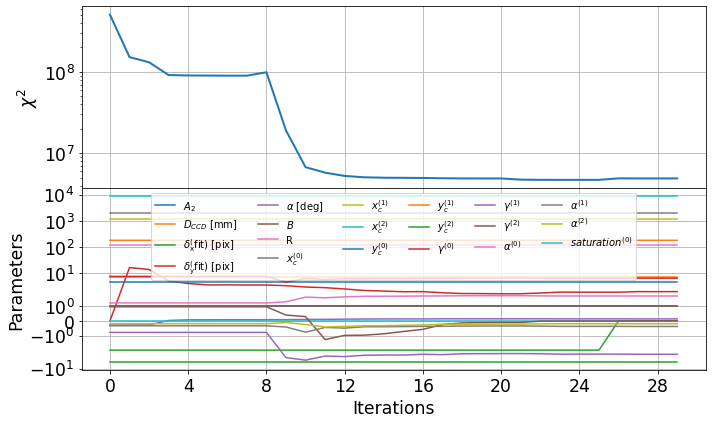

2022-05-25 19:29:44  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit.pdf.
2022-05-25 19:29:45  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit_2.pdf.


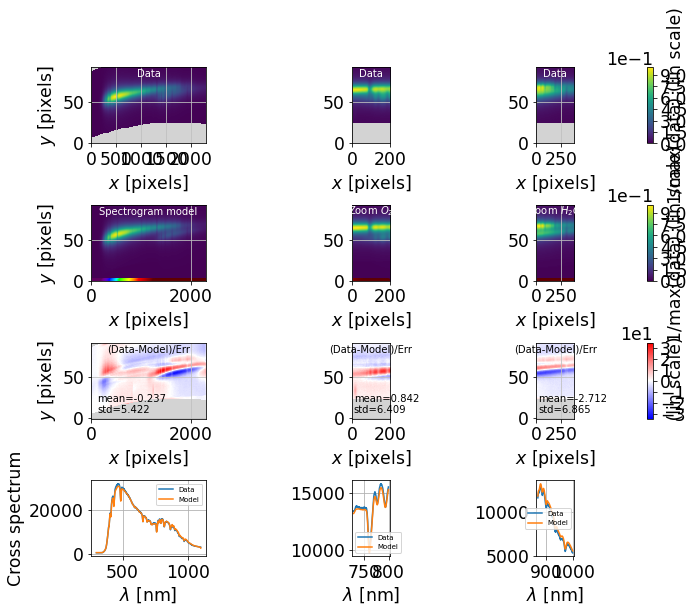

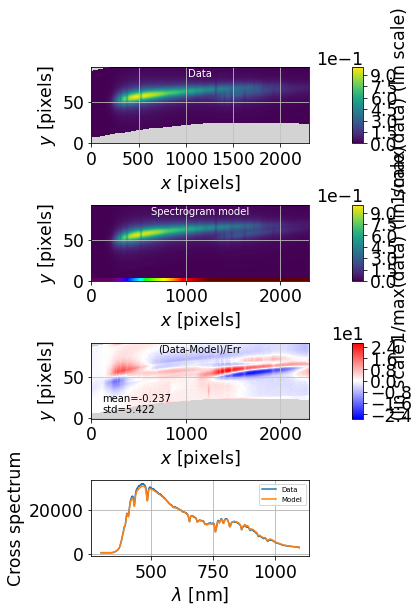

2022-05-25 19:29:47  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure ./figures_process_holo_auxtel/parameters_correlation.pdf.


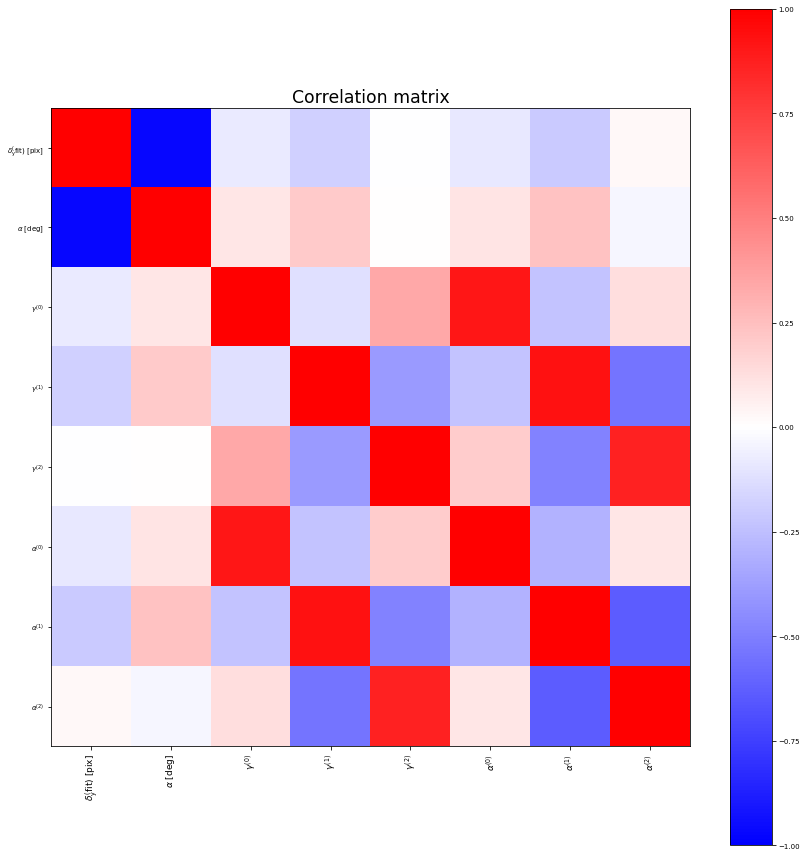

2022-05-25 19:29:48  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-05-25 19:29:48  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Newton: total computation time: 4491.050448894501s
2022-05-25 19:29:48  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit.pdf.
2022-05-25 19:29:50  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure ./figures_process_holo_auxtel/ffm_bestfit_2.pdf.


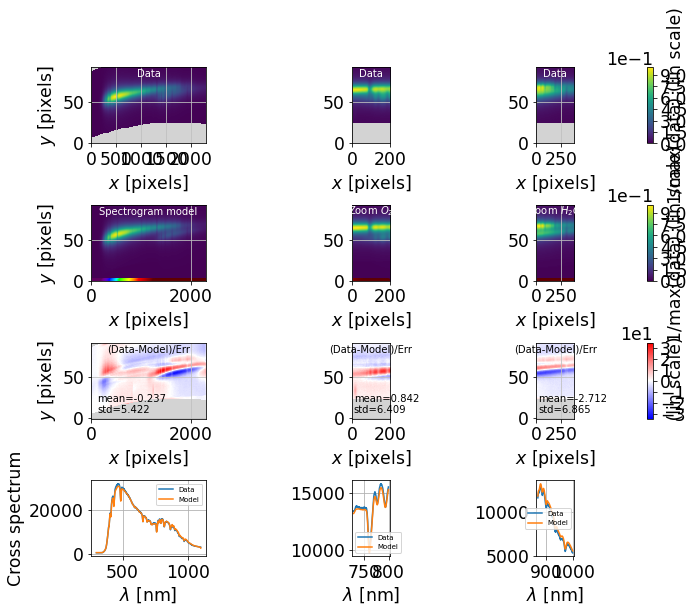

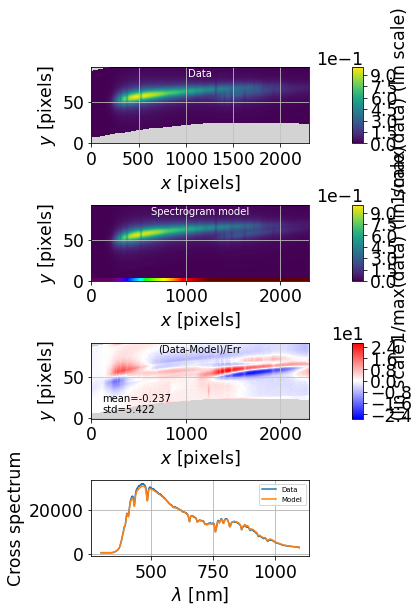

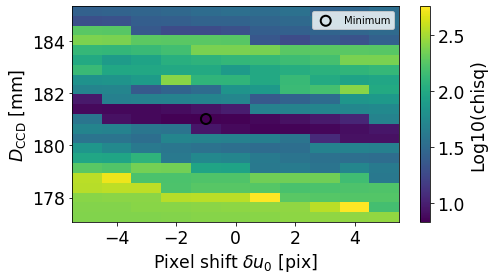

2022-05-25 19:30:29  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: -0.468pix
	D = 180.921 mm (default: DISTANCE2CCD = 181.00 +/- 0.75 mm, -0.1 sigma shift)
2022-05-25 19:30:40  Spectrum   convert_from_ADUrate_to_flam WARNING You ask to convert spectrum already in erg/s/cm$^2$/nm in erg/s/cm^2/nm... check your code ! Skip the instruction.
2022-05-25 19:30:40  astroquery _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.


Set header key DATE-OBS to 2022-03-17T01:59:56.544 from attr date_obs
Set header key EXPTIME to 20.0 from attr expo
Set header key AIRMASS to 1.386860919079735 from attr airmass
Set header key GRATING to holo4_003 from attr disperser_label
Set header key UNIT2 to erg/s/cm$^2$/nm from attr units
Set header key ROTANGLE to 0.14162045446319804 from attr rotation_angle
Set header key DEC to -66.0397222222222 from attr dec
Set header key HA to 42.196644128114244 from attr hour_angle
Set header key OUTTEMP to 10.6 from attr temperature
Set header key OUTPRESS to 743.55 from attr pressure
Set header key OUTHUM to 44.0 from attr humidity
Set header key LBDA_REF to 645.9183541768413 from attr lambda_ref
Set header key PARANGLE to 56.75888867802155 from attr parallactic_angle


2022-05-25 19:30:40  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs_process_holo_auxtel/exposure_2022031600331_postisrccd_spectrum.fits
2022-05-25 19:30:41  Spectrum   save_spectrogram     INFO   
	Spectrogram saved in ./outputs_process_holo_auxtel/exposure_2022031600331_postisrccd_spectrogram.fits
2022-05-25 19:30:43  astroquery _showwarning         WARNING UnitsWarning: 'erg/s/cm$^2$/nm' did not parse as fits unit: Invalid character at col 8 If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html
2022-05-25 19:30:43  astroquery _showwarning         WARNING UnitsWarning: 'reduced' did not parse as fits unit: At col 0, Unit 'reduced' not supported by the FITS standard.  If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file rea

    Line    Tabulated  Detected    Shift        FWHM     Amplitude       SNR       Chisq   Eqwidth_mod Eqwidth_data
                nm        nm         nm          nm                               reduced       nm          nm     
----------- --------- --------- ------------ --------- -------------- ---------- --------- ----------- ------------
   $Fe_{I}$ 382.06653 381.43387  -0.63268334     14.13 -4.7378815e-12   74.58915  70.01782    5.043212    42.323597
  $Ca_{II}$ 393.38922  389.1843     -4.20491 2.3297186  -6.453262e-12  101.59463  70.01782  0.87903357    2.1553085
  $Ca_{II}$ 396.87042  396.9479  0.077504516 3.1756747 -1.0253589e-11  161.42372  70.01782   1.5035702    2.0623395
$H\epsilon$ 397.02344 403.62482    6.6013894     14.13 -6.4868613e-13  10.212358  70.01782  0.37590444    10.568585
  $H\delta$  410.2242 410.18616 -0.038050286 3.3893042 -1.3002012e-11  204.69254  70.01782   1.6000835    1.8240494
   $Fe_{I}$ 430.81543 431.05936   0.24395292  4.437829  -1.485109e-12  2

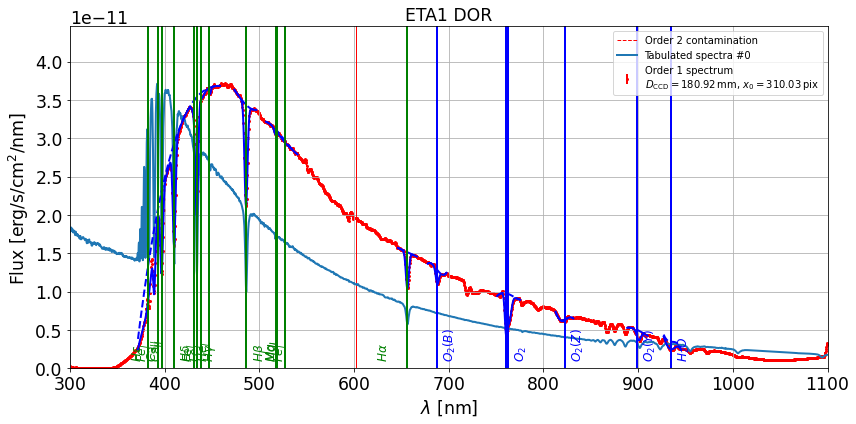

In [90]:
if FLAG_RUNWITHEXCEPTIONS:
    try:
        spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)
    except:
        errtype = sys.exc_info()[0]  # E.g. <class 'PermissionError'>
        description = sys.exc_info()[1]   # E.g. [Errno 13] Permission denied: ...
        
        print("\t +++++++++++++++++++++ Exception occured +++++++++++++++++++++++++++++++++++++++++")
        print(f"\t >>>>>  errtype = {errtype}")
        print(f"\t >>>>>> description = {description}")
else:
    spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)

# Backup output

In [91]:
copy_tree(output_directory,os.path.join(finalpath_output_spectractor,"basespec"))

['/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_table.csv',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_lines.csv',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrogram.fits']

In [92]:
copy_tree(output_figures,os.path.join(finalpath_output_spectractor,"plots"))

['/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331/plots/ffm_bestfit_2.pdf',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331/plots/parameters_correlation.pdf',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331/plots/fit_chromatic_psf_best_fit_noprior.pdf',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331/plots/rotated_image.pdf',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331/plots/extractedLines.fits',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331/plots/fwhm.pdf',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331/plots/order0_centroid_fit.pdf',
 '/Users/sylvie/DAT

In [93]:
!ls -l  $finalpath_output_spectractor/basespec

total 144792
-rw-r--r--  1 sylvie  staff      3657 May 25 19:30 exposure_2022031600331_postisrccd_lines.csv
-rw-r--r--  1 sylvie  staff  30850560 May 25 19:30 exposure_2022031600331_postisrccd_spectrogram.fits
-rw-r--r--  1 sylvie  staff  42687360 May 25 19:30 exposure_2022031600331_postisrccd_spectrum.fits
-rw-r--r--  1 sylvie  staff    586314 May 25 19:30 exposure_2022031600331_postisrccd_table.csv


In [94]:
!ls -l  $finalpath_output_spectractor/plots

total 3584
-rw-r--r--  1 sylvie  staff   20047 May 25 19:30 D2CCD_x0_fit.pdf
-rw-r--r--  1 sylvie  staff  120506 May 25 19:30 ETA1 DOR_spectrum.pdf
-rw-r--r--  1 sylvie  staff   50683 May 25 19:08 amplitude_correlation_matrix.pdf
-rw-r--r--  1 sylvie  staff   45054 May 25 17:56 background_extraction.pdf
-rw-r--r--  1 sylvie  staff   11520 May 25 19:30 extractedLines.fits
-rw-r--r--  1 sylvie  staff  368687 May 25 19:29 ffm_bestfit.pdf
-rw-r--r--  1 sylvie  staff  332376 May 25 19:29 ffm_bestfit_2.pdf
-rw-r--r--  1 sylvie  staff  122645 May 25 17:56 fit_chromatic_psf_best_fit_noprior.pdf
-rw-r--r--  1 sylvie  staff   19665 May 25 17:56 fwhm.pdf
-rw-r--r--  1 sylvie  staff   45607 May 25 17:55 image.pdf
-rw-r--r--  1 sylvie  staff  511317 May 25 17:56 intermediate_spectrum.pdf
-rw-r--r--  1 sylvie  staff   31896 May 25 17:55 order0_centroid_fit.pdf
-rw-r--r--  1 sylvie  staff   21581 May 25 19:29 parameters_correlation.pdf
-rw-r--r--  1 sylvie  staff   21482 May 25 19:08 regularisation.p

In [95]:
finalpath_output_spectractor

'/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/empty~holo4_003/auxtel/20220316/2022031600331'